In [14]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)
kk = k_s*(1+tan(delta)*I)

In [15]:
def collect_numer_pp(expr: Expr, coeffs:list):
    numer_, denom_ = expr.as_numer_denom()
    return Add(*[Mul(numer_.expand().coeff(coeff).simplify() / denom_, coeff, evaluate=False) for coeff in coeffs], evaluate=False)

def collect_numer_ppf(expr: Expr, coeffs:list):
    numer_, denom_ = expr.as_numer_denom()
    return Add(*[Mul(numer_.expand().coeff(coeff).factor() / denom_, coeff, evaluate=False) for coeff in coeffs], evaluate=False)

def get_coeffs(expr: Expr, coeffs:list):
    numer_, denom_ = expr.as_numer_denom()
    return [numer_.expand().coeff(coeff).simplify() / denom_ for coeff in coeffs]

def get_coeffsf(expr: Expr, coeffs:list):
    numer_, denom_ = expr.as_numer_denom()
    return [numer_.expand().coeff(coeff).factor() / denom_ for coeff in coeffs]

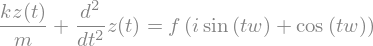

In [16]:
z = Function('z')

eq1 = Eq(z(t).diff(t,2) + k/m*z(t), f*(cos(w*t)+I*sin(w*t))) 
eq1

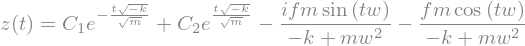

In [17]:
z_dsol = dsolve(eq1, z(t))
z_dsol

In [18]:
la = Symbol('lambda', real=True)
x_ = c*E**(la * t)
eq2 = Eq(m*x.diff(t,2) + k*x_, f*(cos(w*t)+I*sin(w*t)))
eq2

In [19]:
A = symbols('A')
zp = A*exp(I*w*t)
zp

In [20]:
zp.diff(t), zp.diff(t,2)

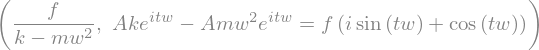

In [21]:
eq3 = Eq(m*zp.diff(t,2) + k*zp, f*(cos(w*t)+I*sin(w*t)))
A_sol = solve(eq3, A)[0]
A_sol, eq3

In [22]:
z_hom = dsolve(Eq(z(t).diff(t,2) + k/m*z(t), 0), z(t)).rhs
z_hom.subs("C2", 0)

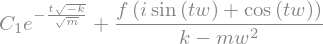

In [23]:
zpf = z_hom + A_sol * (cos(w*t)+I*sin(w*t))
zpf.subs("C2", 0)

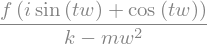

In [24]:
zp_k = A_sol * (cos(w*t)+I*sin(w*t))
zp_k

In [25]:
(m*zp_k.diff(t,2)+k*zp_k).simplify()

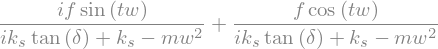

In [26]:
zp = zp_k.subs(k, kk).expand()
zp

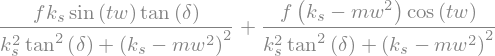

In [27]:
xp = zp.as_real_imag()[0]
xp

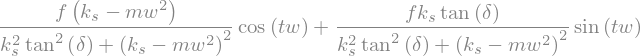

In [28]:
xp_pp = collect_numer_pp(xp, [cos(w*t), sin(w*t)])
xp_pp

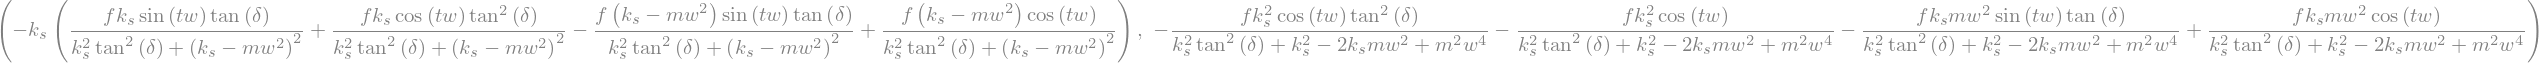

In [29]:
ffhm = (-kk*zp).as_real_imag()[0]
ffhm, ffhm.expand()

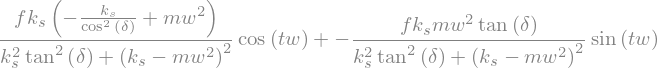

In [30]:
ffhm_pp = collect_numer_pp(ffhm, [cos(w*t), sin(w*t)])
ffhm_pp

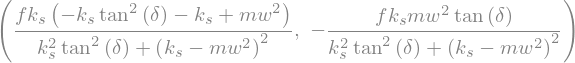

In [31]:
ffhm_cos, ffhm_sin = get_coeffsf(ffhm, [cos(w*t), sin(w*t)])
ffhm_cos, ffhm_sin

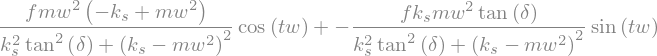

In [43]:
collect_numer_pp(m*xp.diff(t,2), [cos(w*t), sin(w*t)])

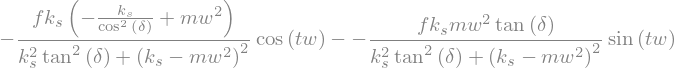

In [72]:
- ffhm_pp

In [73]:
(m*w**2)*(m*w**2)

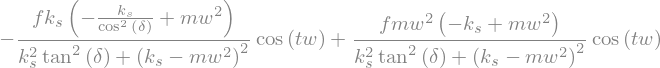

In [74]:
collect_numer_pp(m*xp.diff(t,2), [cos(w*t), sin(w*t)]) - ffhm_pp

In [75]:
ffhm.as_numer_denom()[1].expand()

In [ ]:
((k_s - m * w **2)**2).expand()

k_s**2 - 2*k_s*m*w**2 + m**2*w**4

In [ ]:
(m*xp.diff(t,2) - ffhm).simplify()

f*cos(t*w)

In [ ]:
eval_set = {k_s: 2, m: 3, w: 1, f: 1, delta: S(3)/10}
eval_setw = {k_s: 2, m: 3, f: 1, delta: S(3)/10}
eval_set, eval_setw

({k_s: 2, m: 3, w: 1, f: 1, delta: 3/10}, {k_s: 2, m: 3, f: 1, delta: 3/10})

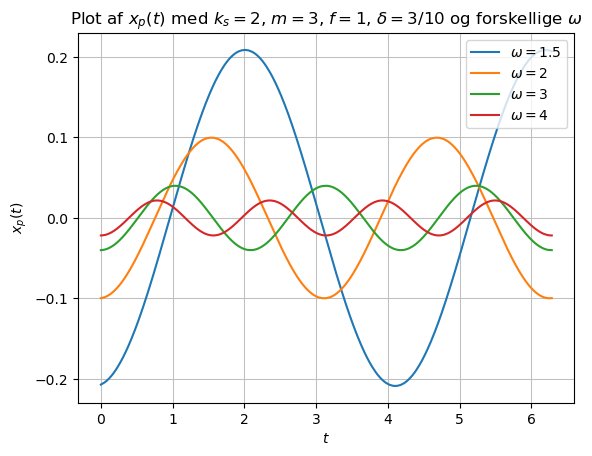

In [ ]:
plt = dtuplot.plot(*[xp.subs(eval_setw).subs(w, w_) for w_ in [1.5, 2, 3, 4]], (t, 0, 2*pi), legend=False, show=False)
plt.title = "Plot af $x_p(t)$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = 3/10$ og forskellige $\omega$"
plt.ylabel = "$x_p(t)$"
plt.ax.legend(labels=['$\omega = 1.5$', '$\omega = 2$', '$\omega = 3$', '$\omega = 4$'], loc='upper right')

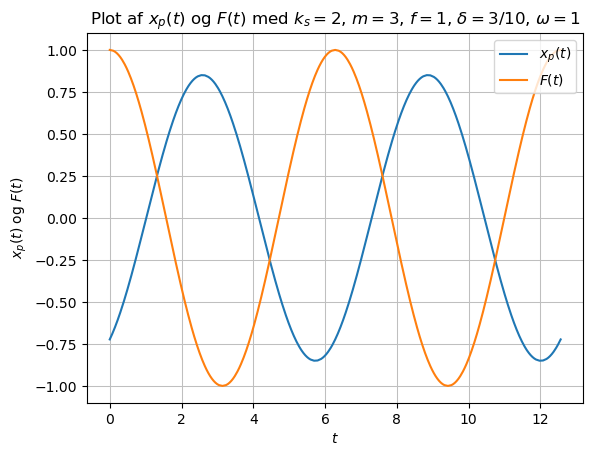

In [ ]:
w_ = 1
plt = dtuplot.plot(xp.subs(eval_setw).subs(w,w_ ), (f*cos(w*t)).subs(eval_setw).subs(w,w_), (t, 0, 4*pi/w_), show=False)
plt.title = "Plot af $x_p(t)$ og $F(t)$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = 3/10$, $\omega = 1$"
plt.ylabel = "$x_p(t)$ og $F(t)$"
plt.ax.legend(labels=['$x_p(t)$', '$F(t)$'], loc='upper right')

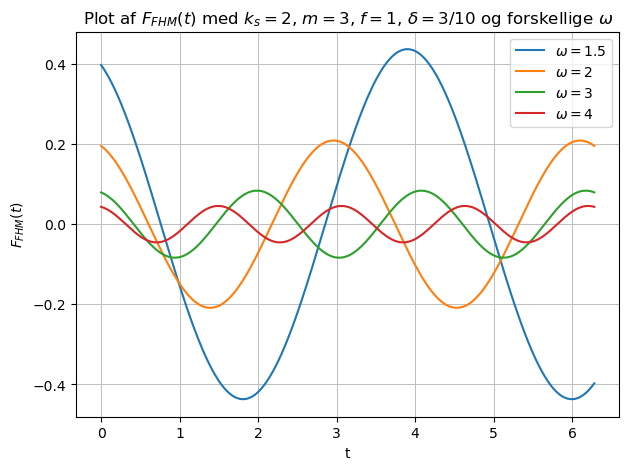

In [ ]:
ffhm_eval = ffhm.subs(eval_setw)
plt = dtuplot.plot(*[ffhm_eval.subs(w, w_) for w_ in [1.5, 2, 3, 4]], (t, 0, 2*pi), use_cm=False, legend=False, show=False)
plt.title = "Plot af $F_{FHM}(t)$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = 3/10$ og forskellige $\omega$"
plt.ylabel = "$F_{FHM}(t)$"
plt.xlabel = "t"
plt.size = (7, 5)
plt.ax.legend(labels=['$\omega = 1.5$', '$\omega = 2$', '$\omega = 3$', '$\omega = 4$'], loc='upper right')

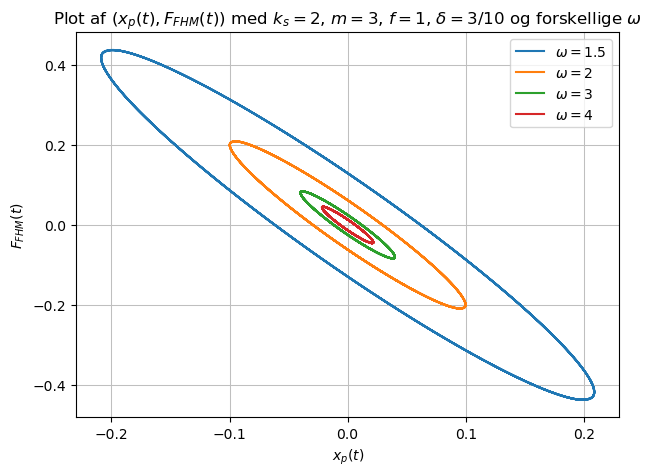

In [ ]:
xp_eval = xp.subs(eval_setw)
ffhm_eval = ffhm.subs(eval_setw)
plt = dtuplot.plot_parametric(*[(xp_eval.subs(w, w_), ffhm_eval.subs(w, w_)) for w_ in [1.5, 2, 3, 4]], (t, 0, 20), use_cm=False, legend=False, show=False)
plt.title = "Plot af $(x_p(t),F_{FHM}(t))$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = 3/10$ og forskellige $\omega$"
plt.xlabel = "$x_p(t)$"
plt.ylabel = "$F_{FHM}(t)$"
plt.size = (7, 5)
plt.ax.legend(labels=['$\omega = 1.5$', '$\omega = 2$', '$\omega = 3$', '$\omega = 4$'], loc='upper right')

In [ ]:
xp_cos, xp_sin = get_coeffs(xp_pp, [cos(w*t), sin(w*t)])
xp_cos, xp_sin

(f*(k_s - m*w**2)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2),
 f*k_s*tan(delta)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2))

In [ ]:
aa = (xp_cos).simplify()
bb = (xp_sin)
xp_n = aa * cos(w*t) + bb * sin(w*t)
xp, xp_n

(f*k_s*sin(t*w)*tan(delta)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2) + f*(k_s - m*w**2)*cos(t*w)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2),
 f*k_s*sin(t*w)*tan(delta)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2) + f*(k_s - m*w**2)*cos(t*w)/(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2))

In [ ]:
AH = sqrt(aa**2 + bb**2).simplify()
phiH = -atan((bb / aa)).simplify()
xp_Aphi = Mul(AH, cos(w*t+phiH), evaluate=False)
xp_Aphi

(f/sqrt(k_s**2*tan(delta)**2 + (k_s - m*w**2)**2))*cos(t*w - atan(k_s*tan(delta)/(k_s - m*w**2)))

In [ ]:
eval_setwd = {k_s: 2, m: 3, f: 1}
eval_setwd

{k_s: 2, m: 3, f: 1}

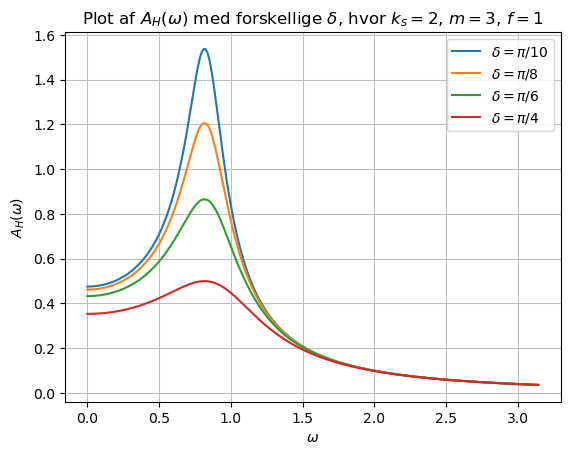

In [ ]:
plt = dtuplot.plot(*[AH.subs(eval_setwd).subs(delta, d_) for d_ in [pi/10, pi/8, pi/6, pi/4]], (w, 0, pi), legend=False, show=False)
plt.title = "Plot af $A_H(\omega)$ med forskellige $\delta$, hvor $k_s = 2$, $m = 3$, $f = 1$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_H(\omega)$"
plt.ax.legend(labels=['$\delta = \pi/10$', '$\delta = \pi/8$', '$\delta = \pi/6$', '$\delta = \pi/4$'], loc='upper right')

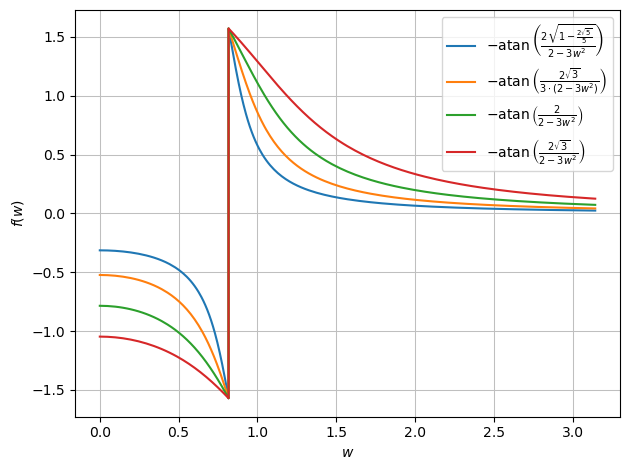

In [ ]:
dtuplot.plot(*[phiH.subs(eval_setwd).subs(delta, d_) for d_ in [pi/10, pi/6, pi/4, pi/3]], (w, 0, pi))

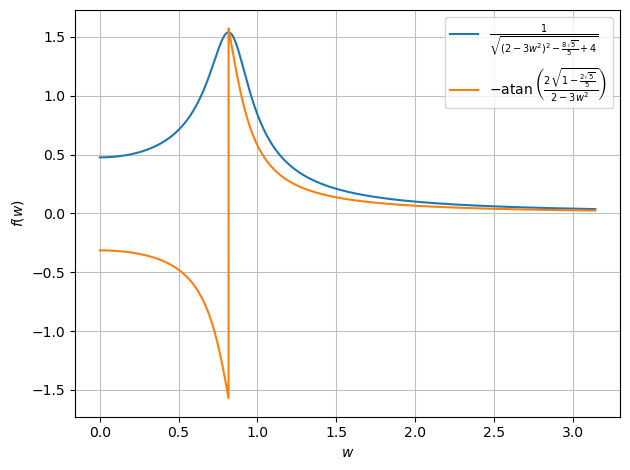

In [ ]:
dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), 
             phiH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi))

In [ ]:
AV = f/sqrt((k_s-m*w**2)**2 + 4*k_s*m*w**2*xi**2)
phiV = arg(1/(k_s - m*w**2+2*xi*w*sqrt(k_s*m)*I))
AV, phiV

(f/sqrt(4*k_s*m*w**2*xi**2 + (k_s - m*w**2)**2),
 arg(1/(2*I*sqrt(k_s)*sqrt(m)*w*xi + k_s - m*w**2)))

In [ ]:
eval_setwxi = {k_s: 2, m: 3, f: 1}
eval_setwxi

{k_s: 2, m: 3, f: 1}

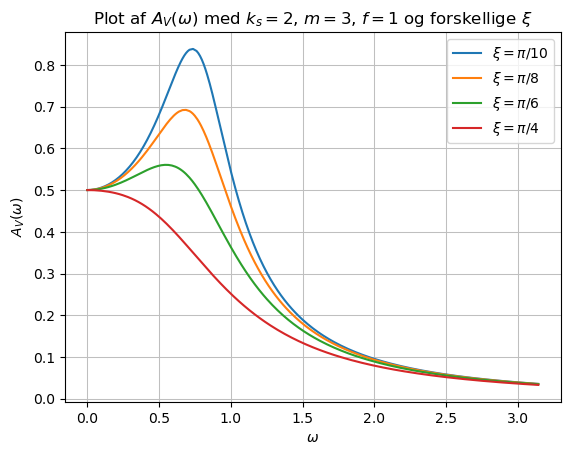

In [ ]:
plt = dtuplot.plot(*[AV.subs(eval_setwd).subs(xi, xi_) for xi_ in [pi/10, pi/8, pi/6, pi/4]], (w, 0, pi), legend=False, show=False)
plt.title = "Plot af $A_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og forskellige $\\xi$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_V(\omega)$"
plt.ax.legend(labels=['$\\xi = \pi/10$', '$\\xi = \pi/8$', '$\\xi = \pi/6$', '$\\xi = \pi/4$'], loc='upper right')

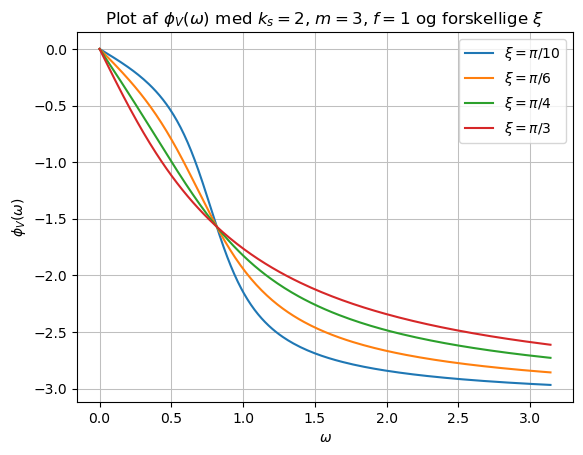

In [ ]:
plt = dtuplot.plot(*[phiV.subs(eval_setwd).subs(xi, xi_) for xi_ in [pi/10, pi/6, pi/4, pi/3]], (w, 0, pi) , legend=False, show=False)
plt.title = "Plot af $\phi_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og forskellige $\\xi$"
plt.xlabel = "$\omega$"
plt.ylabel = "$\phi_V(\omega)$"
plt.ax.legend(labels=['$\\xi = \pi/10$', '$\\xi = \pi/6$', '$\\xi = \pi/4$', '$\\xi = \pi/3$'], loc='upper right')

In [ ]:
sqrt(k_s/m).subs(eval_set).evalf()

0.816496580927726

In [ ]:
phiHp = Piecewise((phiH, phiH<=0), (phiH-pi, True))
phiHp

Piecewise((-atan(k_s*tan(delta)/(k_s - m*w**2)), atan(k_s*tan(delta)/(k_s - m*w**2)) >= 0), (-atan(k_s*tan(delta)/(k_s - m*w**2)) - pi, True))

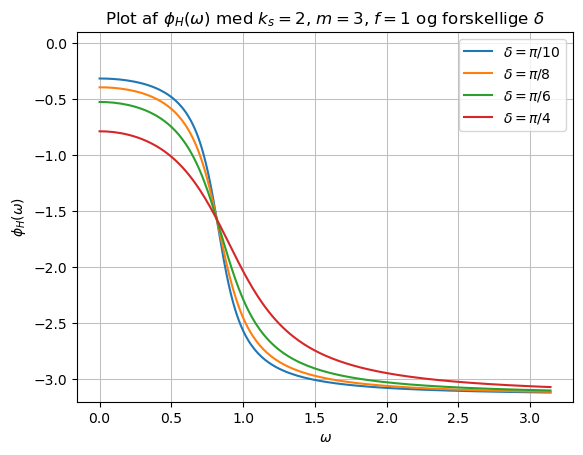

In [ ]:
p1 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), show=False)
p2 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/8), (w, 0, pi), show=False)
p3 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/6), (w, 0, pi), show=False)
p4 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/4), (w, 0, pi), show=False)
comb = p1 + p2 + p3 + p4
comb.title = "Plot af $\phi_H(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og forskellige $\delta$"
comb.xlabel = "$\omega$"
comb.ylabel = "$\phi_H(\omega)$"
comb.ylim = (-3.2, 0.1)
comb.ax.legend(labels=['$\delta = \pi/10$', '$\delta = \pi/8$', '$\delta = \pi/6$', '$\delta = \pi/4$'], loc='upper right')

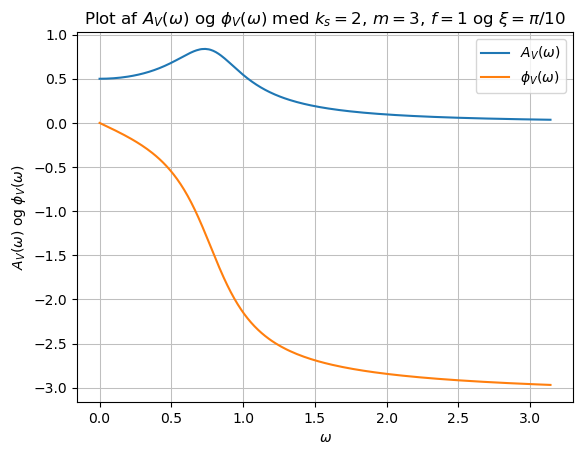

In [ ]:
plt = dtuplot.plot(AV.subs(eval_setwd).subs(xi, pi/10),phiV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), show=False)
plt.title = "Plot af $A_V(\omega)$ og $\phi_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og $\\xi = \pi/10$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_V(\omega)$ og $\phi_V(\omega)$"
plt.ax.legend(labels=['$A_V(\omega)$', '$\phi_V(\omega)$'], loc='upper right')

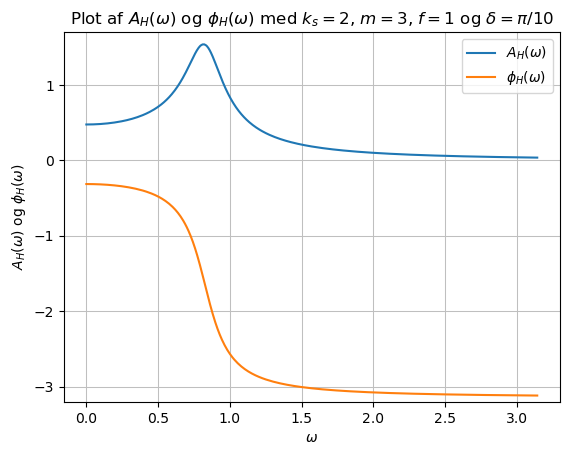

In [ ]:
p1 = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), show=False)
p2 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), show=False)
comb = p1 + p2
comb.title = "Plot af $A_H(\omega)$ og $\phi_H(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og $\delta = \pi/10$"
comb.xlabel = "$\omega$"
comb.ylabel = "$A_H(\omega)$ og $\phi_H(\omega)$"
comb.ylim = (-3.2, 1.7)
comb.ax.legend(labels=['$A_H(\omega)$', '$\phi_H(\omega)$'], loc='upper right')

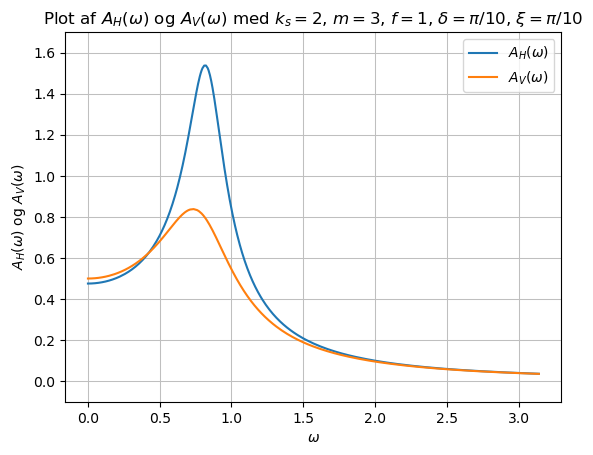

In [ ]:
plt = dtuplot.plot(AH.subs(eval_setwd).subs(delta, pi/10),AV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), show=False)
plt.title = "Plot af $A_H(\omega)$ og $A_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = \pi/10$, $\\xi = \pi/10$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_H(\omega)$ og $A_V(\omega)$"
plt.ylim = (-0.1, 1.7)
plt.ax.legend(labels=['$A_H(\omega)$', '$A_V(\omega)$'], loc='upper right')

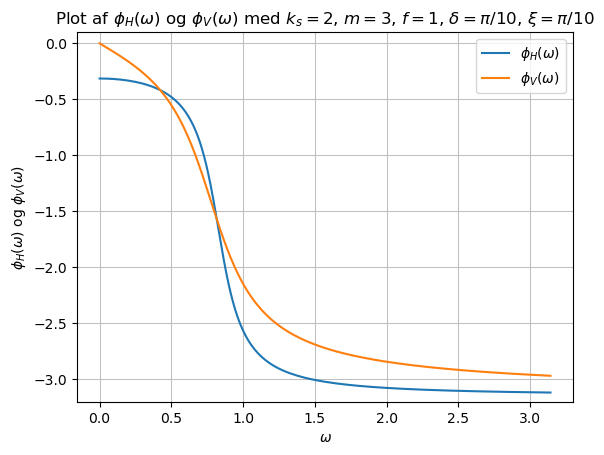

In [ ]:
p1 = dtuplot.plot(phiHp.subs(eval_setwd).subs(delta, pi/10), (w, 0, pi), show=False)
p2 = dtuplot.plot(phiV.subs(eval_setwd).subs(xi, pi/10), (w, 0, pi), show=False)
comb = p1 + p2
comb.title = "Plot af $\phi_H(\omega)$ og $\phi_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$, $\delta = \pi/10$, $\\xi = \pi/10$"
comb.xlabel = "$\omega$"
comb.ylabel = "$\phi_H(\omega)$ og $\phi_V(\omega)$"
comb.ylim = (-3.2, 0.1)
comb.ax.legend(labels=['$\phi_H(\omega)$', '$\phi_V(\omega)$'], loc='upper right')

# Opgave 3.7

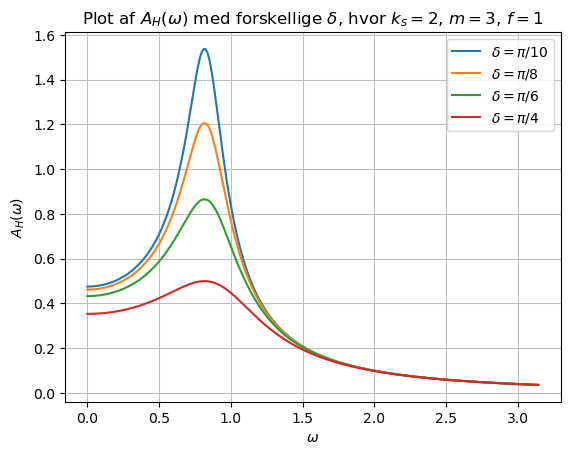

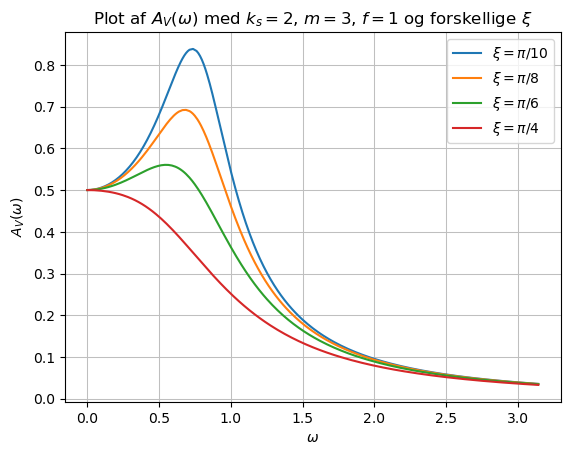

In [ ]:
plt = dtuplot.plot(*[AH.subs(eval_setwd).subs(delta, d_) for d_ in [pi/10, pi/8, pi/6, pi/4]], (w, 0, pi), legend=False, show=False)
plt.title = "Plot af $A_H(\omega)$ med forskellige $\delta$, hvor $k_s = 2$, $m = 3$, $f = 1$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_H(\omega)$"
plt.ax.legend(labels=['$\delta = \pi/10$', '$\delta = \pi/8$', '$\delta = \pi/6$', '$\delta = \pi/4$'], loc='upper right')

plt = dtuplot.plot(*[AV.subs(eval_setwd).subs(xi, xi_) for xi_ in [pi/10, pi/8, pi/6, pi/4]], (w, 0, pi), legend=False, show=False)
plt.title = "Plot af $A_V(\omega)$ med $k_s = 2$, $m = 3$, $f = 1$ og forskellige $\\xi$"
plt.xlabel = "$\omega$"
plt.ylabel = "$A_V(\omega)$"
plt.ax.legend(labels=['$\\xi = \pi/10$', '$\\xi = \pi/8$', '$\\xi = \pi/6$', '$\\xi = \pi/4$'], loc='upper right')

$$
\xi=-\frac{\operatorname{Re}(\lambda)}{|\lambda|} \qquad
\omega_{d}=|\operatorname{Im}(\lambda)| \qquad 
\omega_{n}=|\lambda| \qquad 
T=\frac{2 \pi}{\omega_{d}}
$$

In [ ]:
wr_AH = list(solve(Eq(AH.subs(eval_setwd).diff(w), 0))[2].values())[0]
wn_AH = 
wd_AH = 
wr_AH, wn_AH, wd_AH

SyntaxError: invalid syntax (784081538.py, line 2)

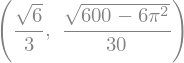

In [ ]:
wr_AV = list(solve(Eq(AV.subs(eval_setwxi).diff(w), 0))[2].values())[0]
wn_AV = sqrt(S(2)/3)
wd_AV = wn_AV * sqrt(1-xi**2).subs(xi, pi/10)
wn_AV, wd_AV.simplify()